In [1]:
import pandas as pd
import numpy as np
import os
import glob

In [2]:
def find_csvs(path, suffix=".csv" ):
    filenames = os.listdir(path)
    return ['data/' + filename for filename in filenames if filename.endswith(suffix)]

In [3]:
csv_paths = find_csvs('data')

In [4]:
for file in csv_paths:
    try:
        print(file)
        pd.read_csv(file)
    except:
        print("couldnt read file")

data/FTNT.csv
data/CTLT.csv
data/EVRG.csv
data/ETSY.csv


In [220]:
ftnt = pd.read_csv(csv_paths[0], parse_dates=['Date'])
ctlc = pd.read_csv(csv_paths[1], parse_dates=['Date'])
evrg = pd.read_csv(csv_paths[2], parse_dates=['Date'])
etsy = pd.read_csv(csv_paths[3], parse_dates=['Date'])

In [226]:
ftnt = ftnt.assign(
    Date=pd.to_datetime(ftnt['Date']), # should be handled by the parse_dates
    company='ftnt'
)
ftnt.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,company
0,2017-01-03,6.112,6.132,5.980,6.024,12206000,0.0,0.0,ftnt
1,2017-01-04,6.030,6.108,6.016,6.084,11611000,0.0,0.0,ftnt
2,2017-01-05,6.052,6.184,6.046,6.166,15568500,0.0,0.0,ftnt
3,2017-01-06,6.160,6.244,6.104,6.202,9631000,0.0,0.0,ftnt
4,2017-01-09,6.200,6.298,6.162,6.262,10128500,0.0,0.0,ftnt


In [232]:
ctlc = ctlc.assign(
    Date=pd.to_datetime(ctlc['Date']), # should be handled by the parse_dates
    company='ctlc'
)
ctlc.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,company
0,2017-01-03,27.09,27.360,26.51,27.00,877300,0.0,0.0,ctlc
1,2017-01-04,27.06,27.410,26.83,27.31,738800,0.0,0.0,ctlc
2,2017-01-05,27.21,27.405,26.65,26.90,728400,0.0,0.0,ctlc
3,2017-01-06,26.86,27.160,26.80,26.88,598300,0.0,0.0,ctlc
4,2017-01-09,26.89,27.090,26.48,26.91,654100,0.0,0.0,ctlc


In [234]:
evrg = evrg.assign(
    Date=pd.to_datetime(evrg['Date']),
    company='evrg'
)
evrg.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,company
0,2017-01-03,42.283,42.366,42.051,42.066,532400,0.0,0.0,evrg
1,2017-01-04,42.231,42.246,41.445,41.520,1546900,0.0,0.0,evrg
2,2017-01-05,41.430,41.550,41.086,41.176,955300,0.0,0.0,evrg
3,2017-01-06,41.108,41.108,40.824,40.929,1423100,0.0,0.0,evrg
4,2017-01-09,40.944,40.944,40.674,40.674,916800,0.0,0.0,evrg


In [236]:
etsy = etsy.assign(
    Date=pd.to_datetime(etsy['Date']),
    company='etsy'
)
etsy.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,company
0,2017-01-03,11.97,12.13,11.74,11.88,1274400,0.0,0.0,etsy
1,2017-01-04,11.91,12.02,11.76,11.97,1043700,0.0,0.0,etsy
2,2017-01-05,12.35,12.51,11.88,12.40,2153700,0.0,0.0,etsy
3,2017-01-06,12.22,13.24,12.11,13.08,3653000,0.0,0.0,etsy
4,2017-01-09,13.08,13.17,12.22,12.35,1961200,0.0,0.0,etsy


In [238]:
dataframes = {'ftnt': ftnt, 'ctlc': ctlc, 'evrg': evrg, 'etsy': etsy}
all_data = pd.concat(dataframes, names=['company'])
all_data.set_index('Date', inplace=True)

In [240]:
# Difference between Open and High

In [242]:
all_data = all_data.assign(open_close_diff = all_data['Open'] - all_data['Close'])

In [244]:
all_data['company'][all_data['open_close_diff'] == 0].unique()

array(['ftnt', 'ctlc', 'evrg', 'etsy'], dtype=object)

In [246]:
# Answer 1.1: all companies have some kind of no difference between open-close

In [248]:
# Answer 1.2: min, max for companies

In [250]:
print(f'FTNT: min price {ftnt["Close"].min()}, max price {ftnt["Close"].max()}')

FTNT: min price 6.024, max price 73.534


In [252]:
print(f'CTLC: min price {ctlc["Close"].min()}, max price {ctlc["Close"].max()}')

CTLC: min price 25.88, max price 142.35


In [254]:
print(f'EVRG: min price {evrg["Close"].min()}, max price {evrg["Close"].max()}')

EVRG: min price 37.172, max price 64.592


In [256]:
print(f'ETSY: min price {etsy["Close"].min()}, max price {etsy["Close"].max()}')

ETSY: min price 9.56, max price 296.91


In [258]:
# Answer 1.3: log return

In [260]:
ftnt = ftnt.assign(
    log_return = np.log(ftnt['Close'] / ftnt['Close'].shift(1))
)
ctlc = ctlc.assign(
    log_return = np.log(ctlc['Close'] / ctlc['Close'].shift(1))
)
evrg = evrg.assign(
    log_return = np.log(evrg['Close'] / evrg['Close'].shift(1))
)
etsy = evrg.assign(
    log_return = np.log(etsy['Close'] / etsy['Close'].shift(1))
)

In [341]:
def get_statistical_info(company_name: str, df_column: pd.Series) -> None:
    mean = df_column.mean()
    min = df_column.min()
    max = df_column.max()
    median = df_column.median()
    print(f'For company log return: {company_name.upper()} the mean is {mean}, min {min}, max {max}, median {median}')
    return

In [264]:
get_statistical_info('ftnt', ftnt['log_return'])

For company: FTNT the mean is 0.0013875555905188627, min -0.17832193237823535, max 0.19249749035815425, median 0.0022701485345390775


In [266]:
get_statistical_info('ctlc', ctlc['log_return'])

For company: CTLC the mean is 0.0003386665482442109, min -0.2829768956753385, max 0.13002553709392026, median 0.0009971237643037001


In [268]:
get_statistical_info('evrg', evrg['log_return'])

For company: EVRG the mean is 0.00020720136916584021, min -0.1750713829056428, max 0.14883914776352156, median 0.0009772584608207006


In [270]:
get_statistical_info('etsy', etsy['log_return'])

For company: ETSY the mean is 0.0015313455353888803, min -0.18808051964596642, max 0.2330968833723615, median 0.0012140221026709596


In [272]:
#Asnwer 1.4

In [274]:
def get_max_min_idx(company_name: str, df: pd.DataFrame) -> None:
    max = df.loc[df['Close'].idxmax()].Date
    min = df.loc[df['Close'].idxmin()].Date
    print(f'{company_name.upper()} highest on: {max.date()}, lowest on: {min.date()}')

In [276]:
get_max_min_idx('ftnt', ftnt)

FTNT highest on: 2021-12-27, lowest on: 2017-01-03


In [278]:
get_max_min_idx('ctlc', ctlc)

CTLC highest on: 2021-09-08, lowest on: 2017-01-17


In [280]:
get_max_min_idx('evrg', evrg)

EVRG highest on: 2022-04-20, lowest on: 2020-03-23


In [282]:
get_max_min_idx('etsy', etsy)

ETSY highest on: 2022-04-20, lowest on: 2020-03-23


In [284]:
# 1.5 resampling

In [286]:
ftnt.resample('W-MON', on="Date", closed='left', origin="start")['Volume'].sum().mean()

36679740.57507987

In [288]:
ctlc.resample('W-MON', on="Date", closed='left', origin="start")['Volume'].sum().mean()

5346457.188498403

In [290]:
evrg.resample('W-MON', on="Date", closed='left', origin="start")['Volume'].sum().mean()

7484903.514376997

In [292]:
etsy.resample('W-MON', on="Date", closed='left', origin="start")['Volume'].sum().mean()

7484903.514376997

In [305]:
# 1.6

In [315]:
ftnt['Close'].cumsum()

0           6.024
1          12.108
2          18.274
3          24.476
4          30.738
          ...    
1505    42321.628
1506    42370.178
1507    42418.038
1508    42467.248
1509    42516.138
Name: Close, Length: 1510, dtype: float64

In [317]:
ctlc['Close'].cumsum()

0           27.00
1           54.31
2           81.21
3          108.09
4          135.00
          ...    
1505    102383.55
1506    102426.87
1507    102469.81
1508    102515.07
1509    102560.08
Name: Close, Length: 1510, dtype: float64

In [319]:
evrg['Close'].cumsum()

0          42.066
1          83.586
2         124.762
3         165.691
4         206.365
          ...    
1505    73566.977
1506    73624.987
1507    73682.768
1508    73740.814
1509    73798.321
Name: Close, Length: 1510, dtype: float64

In [321]:
etsy['Close'].cumsum()

0          42.066
1          83.586
2         124.762
3         165.691
4         206.365
          ...    
1505    73566.977
1506    73624.987
1507    73682.768
1508    73740.814
1509    73798.321
Name: Close, Length: 1510, dtype: float64

In [323]:
#  1.7

In [331]:
labels = 'Low', 'Medium', 'High', 'Very high'
all_data['volume_class'] = pd.qcut(all_data['Volume'], len(labels), labels=labels)

In [333]:
all_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,company,open_close_diff,volume_category,volume_class
Date,,,,,,,,,,,
2017-01-03,6.112,6.132,5.980,6.024,12206000,0.0,0.0,ftnt,0.088,Very high,Very high
2017-01-04,6.030,6.108,6.016,6.084,11611000,0.0,0.0,ftnt,-0.054,Very high,Very high
2017-01-05,6.052,6.184,6.046,6.166,15568500,0.0,0.0,ftnt,-0.114,Very high,Very high
2017-01-06,6.160,6.244,6.104,6.202,9631000,0.0,0.0,ftnt,-0.042,Very high,Very high
2017-01-09,6.200,6.298,6.162,6.262,10128500,0.0,0.0,ftnt,-0.062,Very high,Very high
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,126.800,127.733,124.010,126.940,1353800,0.0,0.0,etsy,-0.140,Medium,Medium
2022-12-27,126.030,126.490,121.230,121.340,1843300,0.0,0.0,etsy,4.690,Medium,Medium
2022-12-28,120.400,121.780,118.920,120.400,1824900,0.0,0.0,etsy,0.000,Medium,Medium


In [335]:
import matplotlib.pyplot as plt

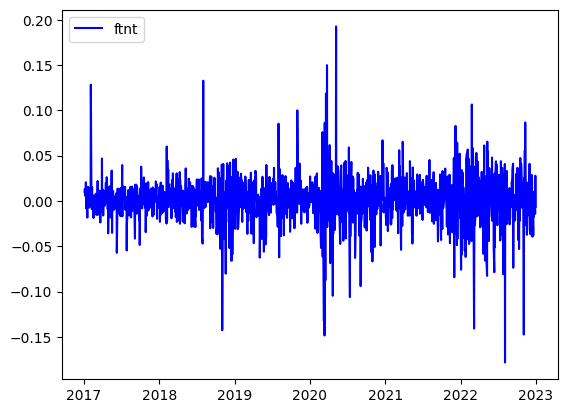

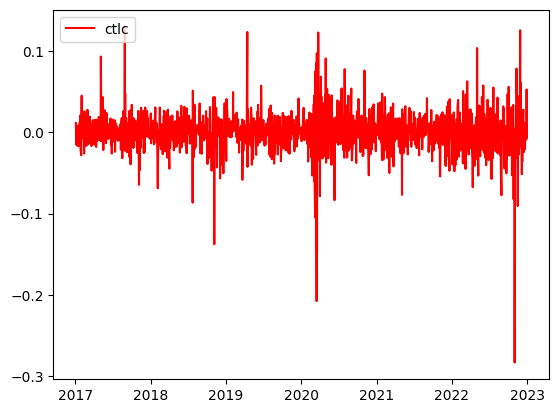

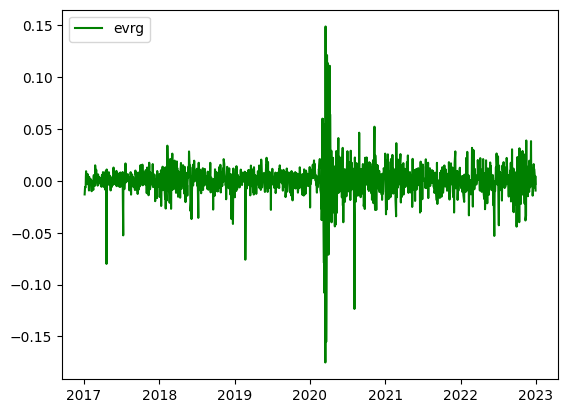

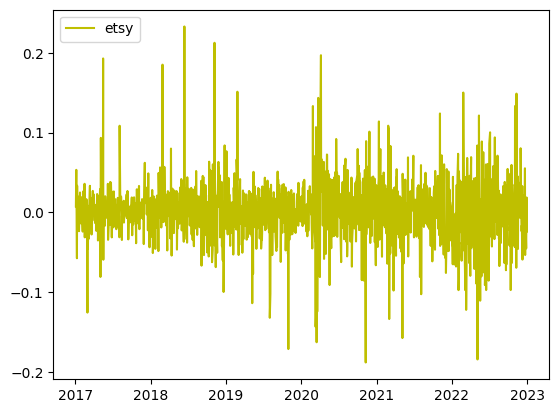

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


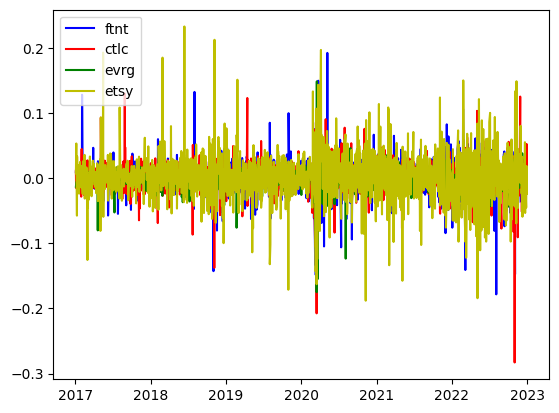

In [357]:
fig = plt.figure()
x = ftnt['Date']
y1 = ftnt['log_return']
y2 = ctlc['log_return']
y3 = evrg['log_return']
y4 = etsy['log_return']

plt.plot(x, y1, "-b", label="ftnt")

plt.legend(loc="upper left")
plt.show()

plt.plot(x, y2, "-r", label="ctlc")
plt.legend(loc="upper left")

plt.show()

plt.plot(x, y3, "-g", label="evrg")
plt.legend(loc="upper left")

plt.show()

plt.plot(x, y4, "-y", label="etsy")
plt.legend(loc="upper left")

plt.show()

plt.legend(loc="upper left")

plt.plot(x, y1, "-b", label="ftnt")
plt.plot(x, y2, "-r", label="ctlc")
plt.plot(x, y3, "-g", label="evrg")
plt.plot(x, y4, "-y", label="etsy")
plt.legend(loc="upper left")

plt.show()

# it looks terrible and i was out of time so there are separate ones as well

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


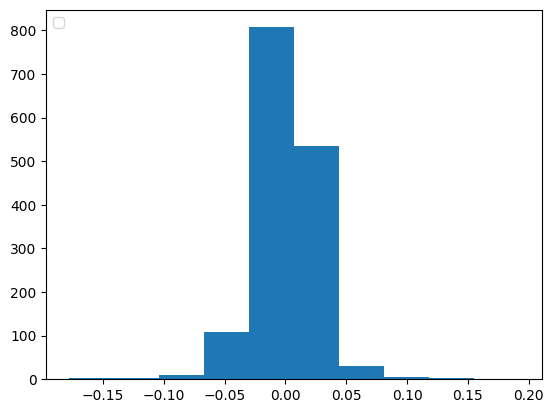

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


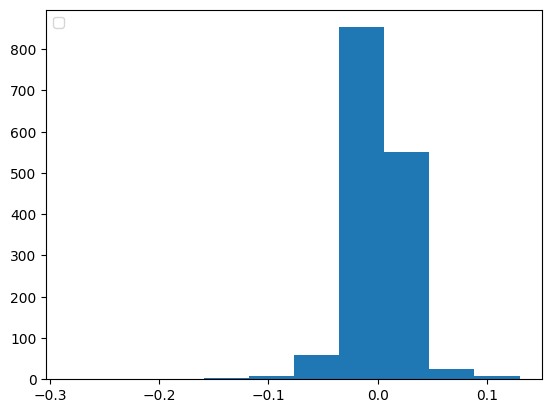

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


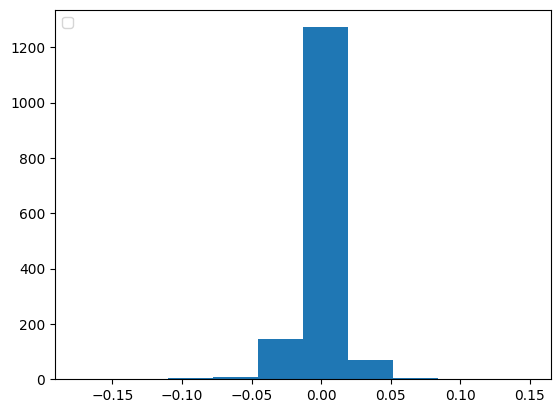

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


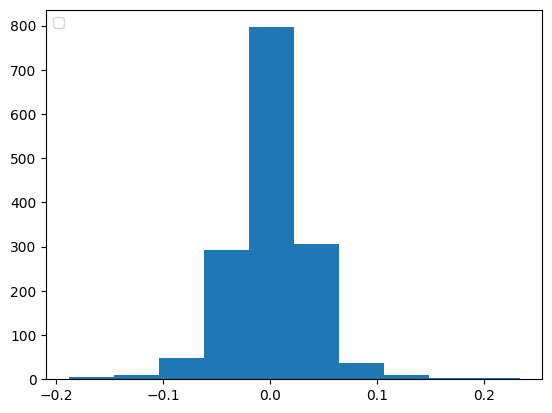

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


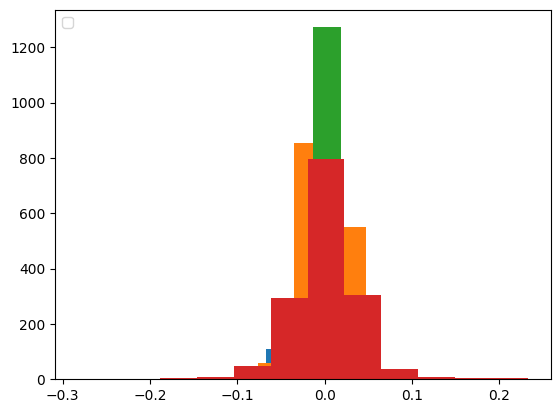

In [363]:
fig = plt.figure()
y1 = ftnt['log_return']
y2 = ctlc['log_return']
y3 = evrg['log_return']
y4 = etsy['log_return']

plt.hist(y1)
plt.legend(loc="upper left")
plt.show()

plt.hist(y2)
plt.legend(loc="upper left")

plt.show()

plt.hist(y3)
plt.legend(loc="upper left")

plt.show()

plt.hist(y4)
plt.legend(loc="upper left")

plt.show()

plt.legend(loc="upper left")

plt.hist(y1)
plt.hist(y2)
plt.hist(y3)
plt.hist(y4)
plt.legend(loc="upper left")

plt.show()

# it looks terrible and i was out of time so there are separate ones as well

In [365]:
# task 2

In [437]:
df = pd.read_csv('https://ies-fsv.s3.eu-central-1.amazonaws.com/companies/companies_no_subindustry.csv')

In [439]:
df.shape

(503, 6)

In [441]:
df.head()

,Symbol,Security,GICS_Sector,hq,included,Founded
0,MMM,3M,Industrials,"Saint Paul, Minnesota",09.08.1976,1902
1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",26.07.2017,1916
2,ABT,Abbott,Health Care,"North Chicago, Illinois",31.03.1964,1888
3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",31.12.2012,2013 (1888)
4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",31.05.2018,1981


In [443]:
# 2.1

In [445]:
df['Symbol'][df['included'].isna()].nunique()

45

In [447]:
# 2.2

In [449]:
df = df.dropna(subset=['included'])

In [451]:
df.shape

(458, 6)

In [453]:
df['Date'] = pd.to_datetime(df['included'], dayfirst=True, errors='coerce')

In [467]:
df['Symbol'][df['Date'] == df['Date'].min()] #oldest?

25      MO
31     AEP
72      BA
77     BMY
86     CPB
93     CAT
105    CVX
118     KO
120     CL
124    COP
138    CVS
143     DE
159    DTE
167    EIX
174    ETR
187    EXC
191    XOM
204      F
216     GD
225    HAL
226    HIG
231    HSY
245    IBM
254     IP
274    KMB
279     KR
310    MRK
342    NSC
368    PEP
370    PFE
378    PPG
381     PG
385    PEG
413    SEE
423     SO
460    UNP
496    XEL
Name: Symbol, dtype: object

In [463]:
df['Symbol'][df['Date'] == df['Date'].max()] # youngest

48    ACGL
Name: Symbol, dtype: object

In [471]:
import datetime

In [487]:
df = df.assign(
    years_old = (datetime.datetime.now() - df['Date']))

In [505]:
df['years_old'].mean().total_seconds() / 31556926 
# the average age is 23.44 years idk why i divided by seconds it was the first that came into my mind

23.443687536670776

In [517]:
cats = df['GICS_Sector'].unique()

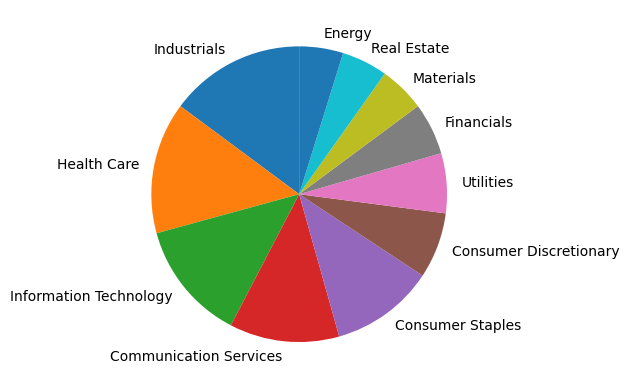

In [525]:
plt.pie(df['GICS_Sector'].value_counts(), labels = cats, startangle = 90)
plt.show()

In [547]:
df['state'] = df['hq'].apply(lambda x: x.split(',')[1].strip())

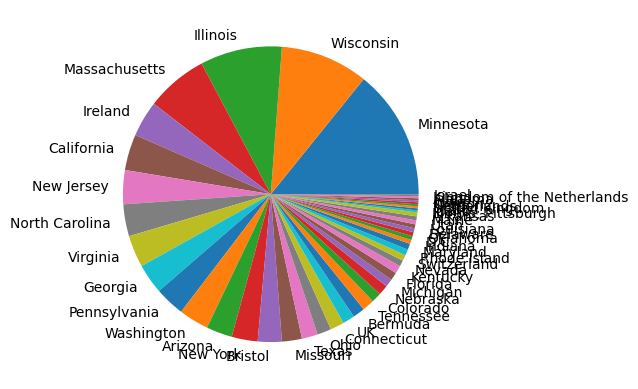

In [561]:
plt.pie(df['state'].value_counts(), labels = df['state'].unique())
plt.show() 

In [ ]:
# couldnt finish the 2.5 it would be something

In [563]:
df1 = pd.read_csv('https://ies-fsv.s3.eu-central-1.amazonaws.com/companies/companies_subindustry.csv')

In [565]:
df1

,Symbol,subindustry
0,MMM,Industrial Conglomerates
1,AOS,Building Products
2,ABT,Health Care Equipment
3,ABBV,Pharmaceuticals
4,ABMD,Health Care Equipment
...,...,...
498,YUM,Restaurants
499,ZBRA,Electronic Equipment & Instruments
500,ZBH,Health Care Equipment
501,ZION,Regional Banks


In [573]:
df_merged = df.merge(df1, on = 'Symbol')
df_merged

,Symbol,Security,GICS_Sector,hq,included,Founded,Date,years_old,state,subindustry
0,MMM,3M,Industrials,"Saint Paul, Minnesota",09.08.1976,1902,1976-08-09,17640 days 19:42:08.079129,Minnesota,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",26.07.2017,1916,2017-07-26,2679 days 19:42:08.079129,Wisconsin,Building Products
2,ABT,Abbott,Health Care,"North Chicago, Illinois",31.03.1964,1888,1964-03-31,22154 days 19:42:08.079129,Illinois,Health Care Equipment
3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",31.12.2012,2013 (1888),2012-12-31,4347 days 19:42:08.079129,Illinois,Pharmaceuticals
4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",31.05.2018,1981,2018-05-31,2370 days 19:42:08.079129,Massachusetts,Health Care Equipment
...,...,...,...,...,...,...,...,...,...,...
453,YUM,Yum! Brands,Consumer Discretionary,"Louisville, Kentucky",06.10.1997,1997,1997-10-06,9912 days 19:42:08.079129,Kentucky,Restaurants
454,ZBRA,Zebra Technologies,Information Technology,"Lincolnshire, Illinois",23.12.2019,1969,2019-12-23,1799 days 19:42:08.079129,Illinois,Electronic Equipment & Instruments
455,ZBH,Zimmer Biomet,Health Care,"Warsaw, Indiana",07.08.2001,1927,2001-08-07,8511 days 19:42:08.079129,Indiana,Health Care Equipment
456,ZION,Zions Bancorporation,Financials,"Salt Lake City, Utah",22.06.2001,1873,2001-06-22,8557 days 19:42:08.079129,Utah,Regional Banks


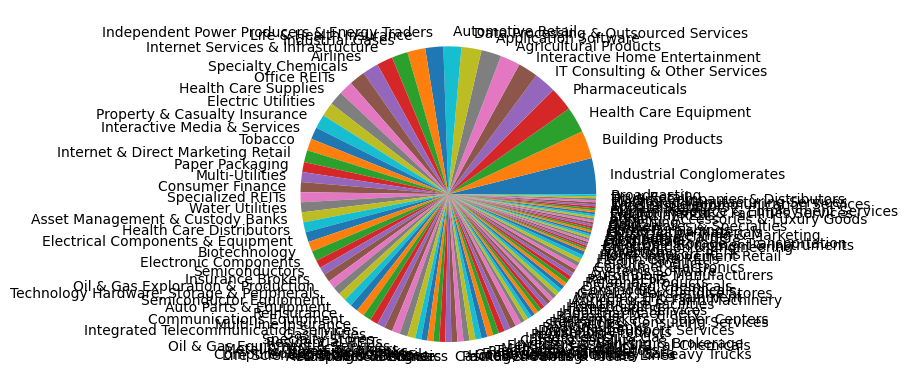

In [577]:
plt.pie(df_merged['subindustry'].value_counts(), labels = df_merged['subindustry'].unique())
plt.show() # idk i was out of time